### Setup

In [45]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [46]:
# Load Data

data = pd.read_csv('26_somnolyzer_demographic_data.csv')

In [47]:
# Functions

def to_bin(v, step):
    if type(v) == np.float64:
        if np.isnan(v):
            return -1
        return int(v - v % step)
    return v

def to_stacked(primary, secondary, primary_step=None, secondary_step=None):

    # Primary Bins
    if type(data[primary][0]) == np.float64:
        assert primary_step is not None
        mn, mx = data[primary].min(), data[primary].max()
        primary_bins = list(range(int((mn//primary_step)*primary_step), int((1+mx//primary_step)*primary_step), primary_step))
    else:
        primary_bins = Counter(data[primary]).keys()

    # Secondary Bins
    if type(data[secondary][0]) == np.float64:
        assert secondary_step is not None
        mn, mx = data[secondary].min(), data[secondary].max()
        secondary_bins = list(range(int((mn//secondary_step)*secondary_step), int((1+mx//secondary_step)*secondary_step), secondary_step))
    else:
        secondary_bins = Counter(data[secondary]).keys()
    
    # Collecting Data
    idx = {l: v for l, v in zip(primary_bins, range(len(primary_bins)))}
    stacked = {secondary_key: np.zeros(len(primary_bins)) for secondary_key in secondary_bins}
    for i in range(len(data)):
        person = data.iloc[i]
        primary_bin, secondary_bin = to_bin(person[primary], primary_step), to_bin(person[secondary], secondary_step)
        if -1 in [primary_bin, secondary_bin]:
            continue
        stacked[secondary_bin][idx[primary_bin]] += 1

    return list(map(str, primary_bins)), stacked

def stacked_plot(primary, secondary, primary_step=None, secondary_step=None):
    primary_bins, stacked = to_stacked(primary, secondary, primary_step, secondary_step)

    fig, ax = plt.subplots()
    bottom = np.zeros(len(primary_bins))

    for secondary_bin, amounts in stacked.items():
        p = ax.bar(primary_bins, amounts, 0.5, label=(f'{secondary}>=' if type(secondary_bin) == int else '') + str(secondary_bin), bottom=bottom)
        for i, amount in enumerate(amounts):
            ax.annotate(str(int(amount)), xy=(i, amount+bottom[i]))
        bottom += amounts

    ax.legend()
    ax.set_xlabel(primary)
    plt.show()

def scatter_plot(x, y):
    fig, ax = plt.subplots()
    ax.scatter(data[x], data[y], c=np.random.rand(len(data), 1))
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    plt.show()

def box_plot(value, by):
    labels = sorted(Counter(data[by]).keys())

    values = [data.loc[data[by] == label][value] for label in labels]

    fig, ax = plt.subplots()
    bp = ax.boxplot(values, tick_labels=labels)
    ax.set_xlabel(by)
    ax.set_ylabel(value)
    plt.show()

### Plots

In [48]:
data

,mesaid,nsrr_age,nsrr_bmi,nsrr_sex,nsrr_race,nsrr_current_smoker,nsrr_ever_smoker,nsrr_ahi,nsrr_ari,nsrr_tst,self_ahi,self_ari,self_tst
0,1,70.0,22.01,female,white,no,yes,27.56,27.03,344.0,17.380586,34.206471,324.5
1,2,83.0,21.90,female,white,not reported,no,10.75,24.55,374.0,10.000000,48.852459,366.0
2,6,57.0,56.01,female,hispanic,no,yes,67.21,21.79,358.0,58.486056,25.019920,376.5
3,10,57.0,19.84,male,white,not reported,no,48.00,46.91,110.0,29.702970,28.514851,202.0
4,12,80.0,27.77,male,white,not reported,no,33.63,28.79,273.0,26.430868,45.144695,311.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882,6804,77.0,24.32,female,black or african american,not reported,no,35.77,18.20,478.0,43.689320,24.320388,412.0
1883,6807,60.0,28.32,male,hispanic,no,yes,49.60,30.75,398.0,44.462810,53.884298,363.0
1884,6810,77.0,30.47,male,hispanic,no,yes,30.44,20.35,339.0,28.376068,24.444444,351.0
1885,6811,79.0,27.73,male,hispanic,no,yes,45.33,58.04,368.0,39.189873,43.594937,395.0


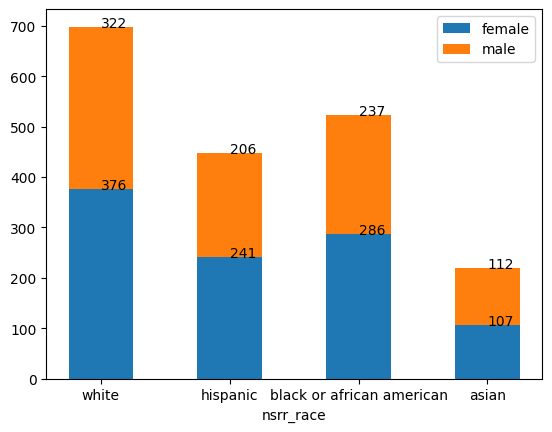

In [49]:
stacked_plot('nsrr_race', 'nsrr_sex')

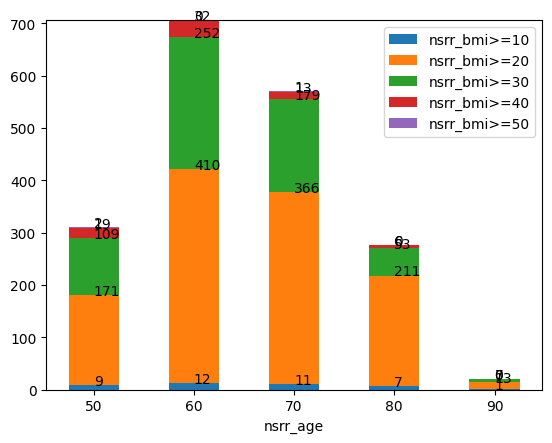

In [50]:
stacked_plot('nsrr_age', 'nsrr_bmi', primary_step=10, secondary_step=10)

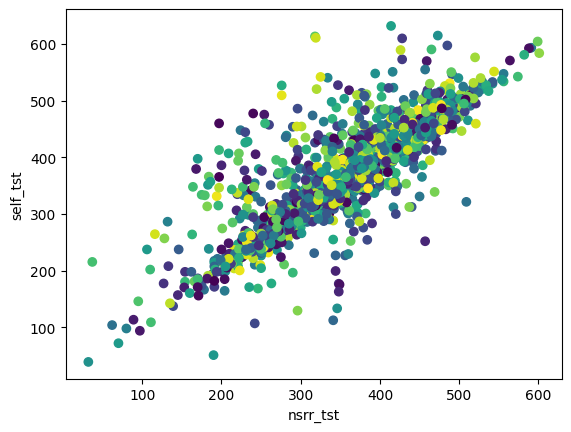

In [51]:
scatter_plot('nsrr_tst', 'self_tst')

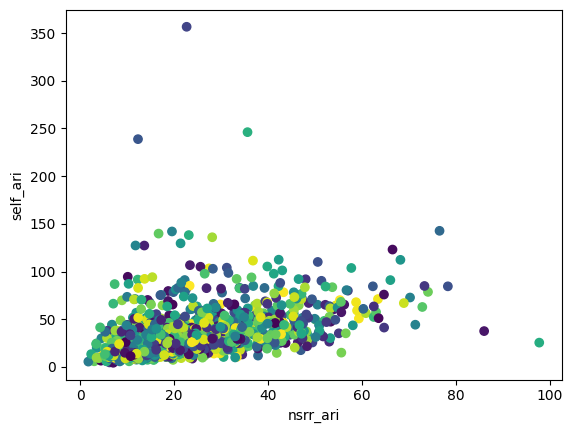

In [67]:
scatter_plot('nsrr_ari', 'self_ari')

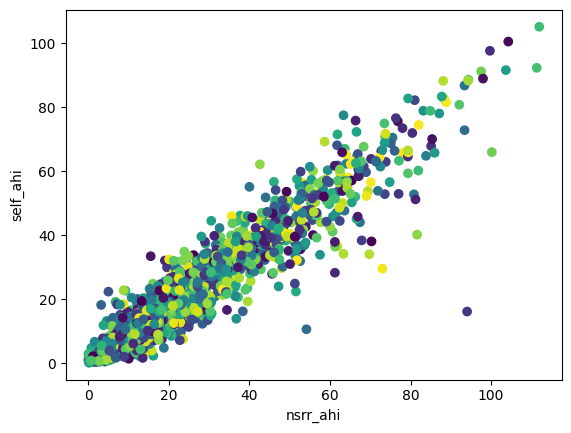

In [68]:
scatter_plot('nsrr_ahi', 'self_ahi')

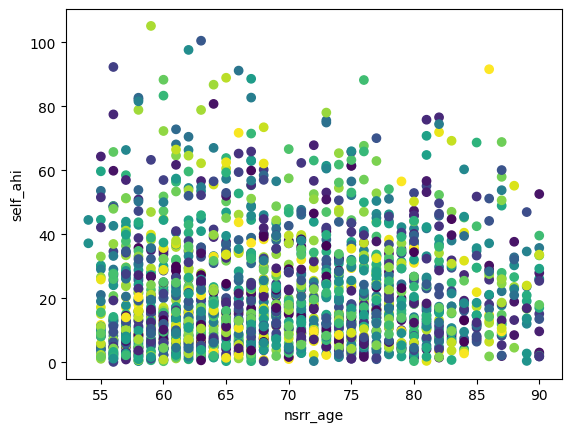

In [54]:
scatter_plot('nsrr_age', 'self_ahi')

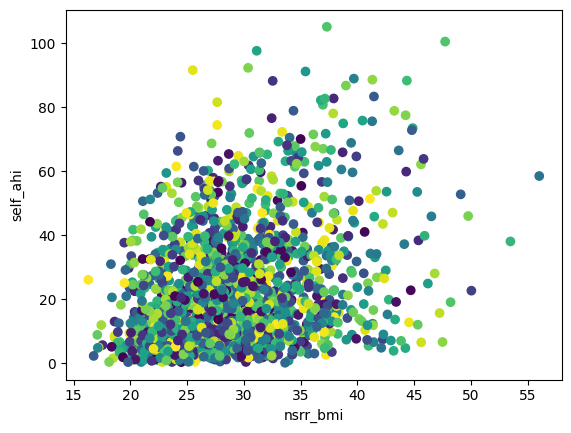

In [55]:
scatter_plot('nsrr_bmi', 'self_ahi')

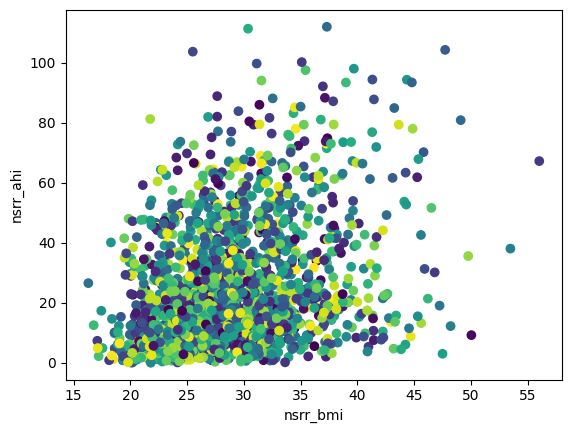

In [56]:
scatter_plot('nsrr_bmi', 'nsrr_ahi')

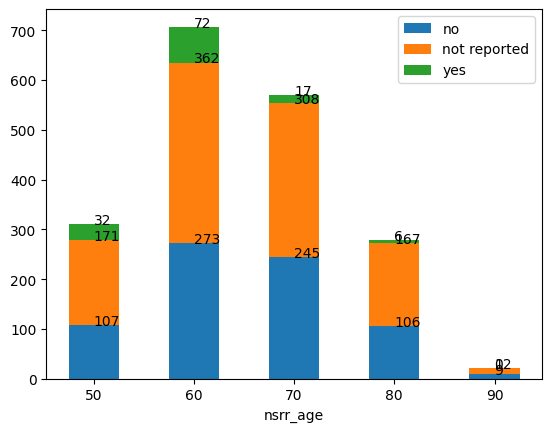

In [57]:
stacked_plot('nsrr_age', 'nsrr_current_smoker', primary_step=10)

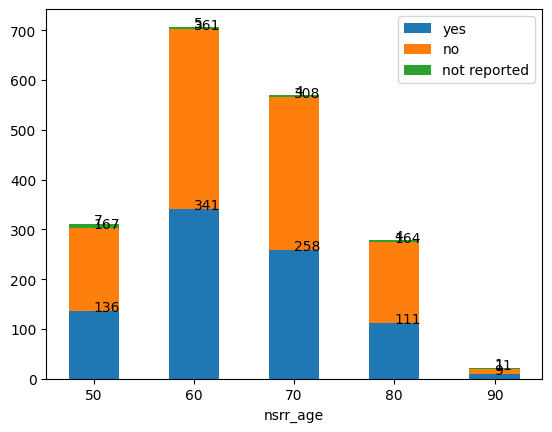

In [58]:
stacked_plot('nsrr_age', 'nsrr_ever_smoker', primary_step=10)

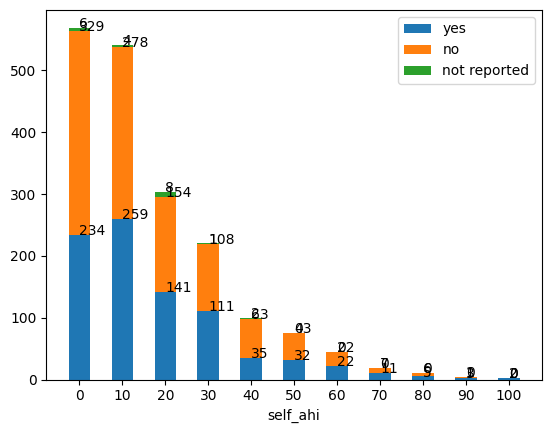

In [59]:
stacked_plot('self_ahi', 'nsrr_ever_smoker', primary_step=10)

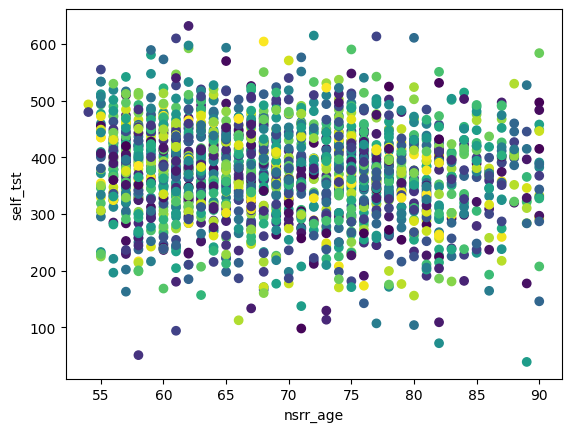

In [60]:
scatter_plot('nsrr_age', 'self_tst')

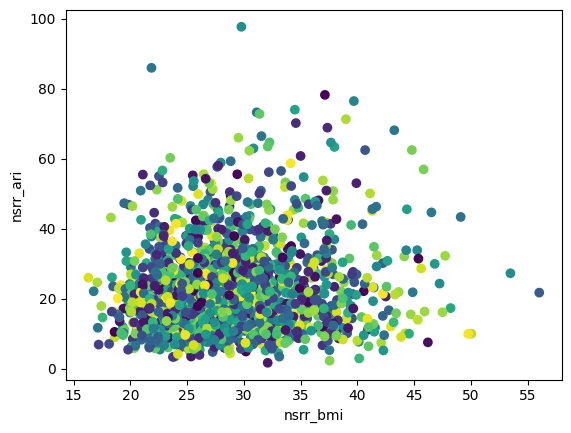

In [61]:
scatter_plot('nsrr_bmi', 'nsrr_ari')

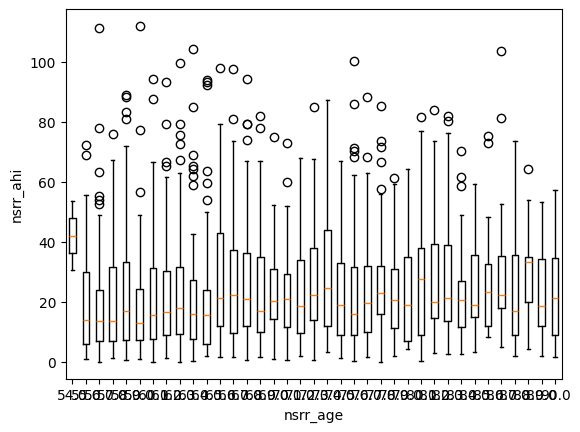

In [62]:
box_plot('nsrr_ahi', 'nsrr_age')

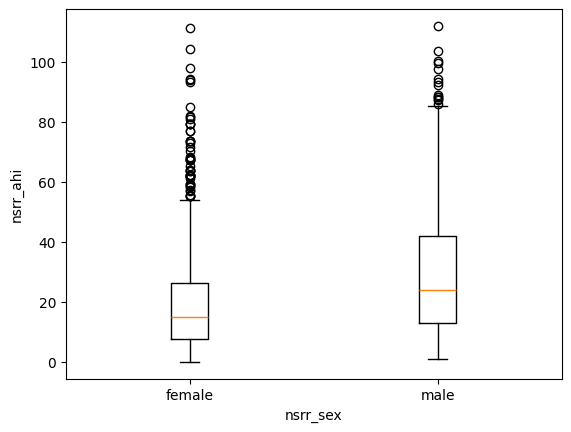

In [63]:
box_plot('nsrr_ahi', 'nsrr_sex')

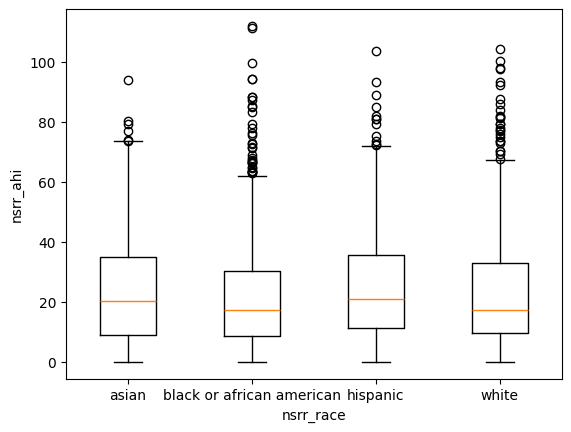

In [64]:
box_plot('nsrr_ahi', 'nsrr_race')

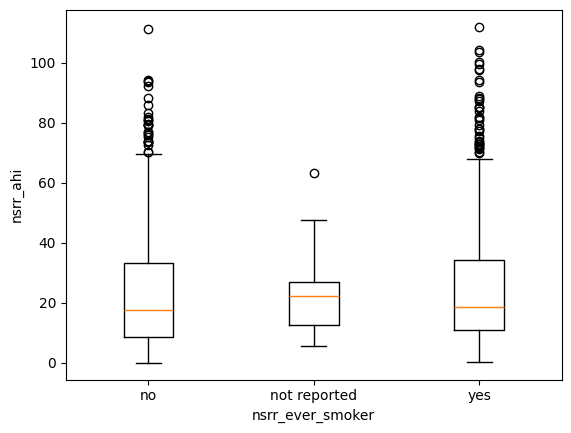

In [65]:
box_plot('nsrr_ahi', 'nsrr_ever_smoker')

### Different NSRR AHI definitions

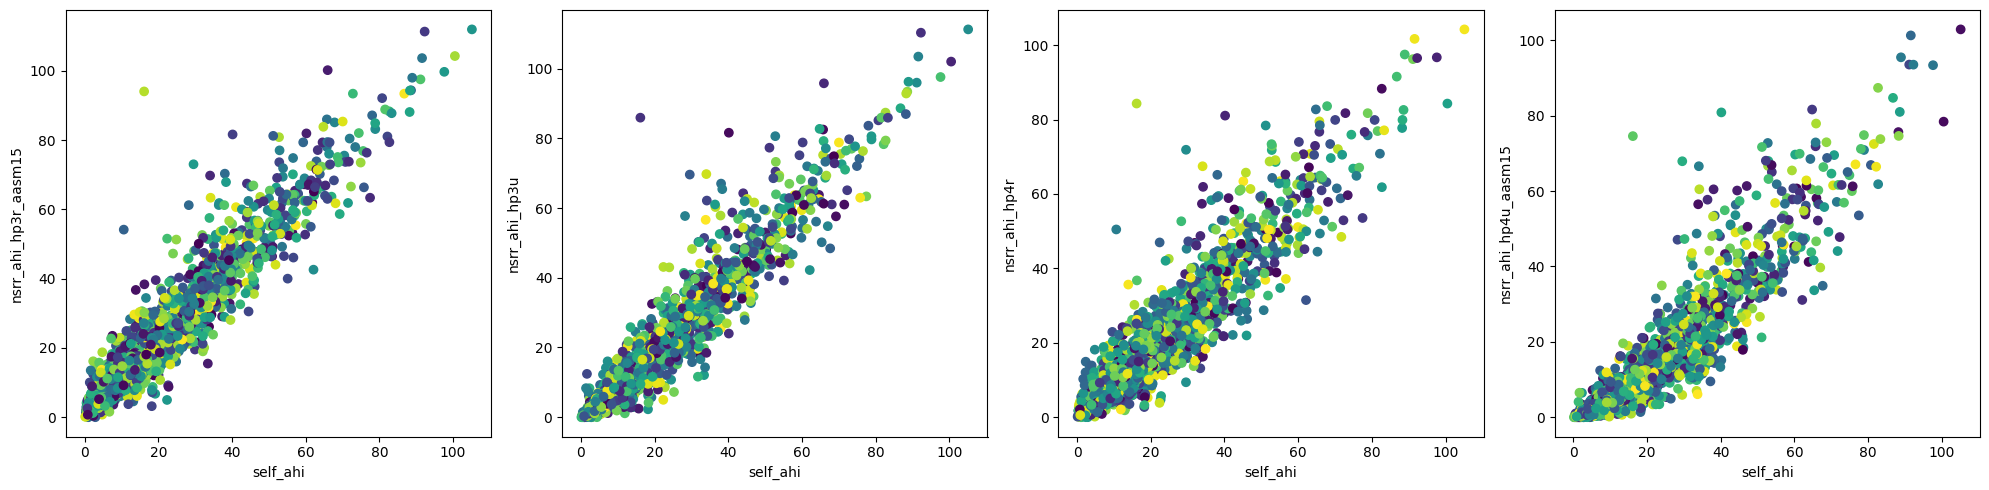

In [66]:
from wearsed.dataset.WearSEDDataset import WearSEDDataset

nsrr_ahi_definitions = ['nsrr_ahi_hp3r_aasm15', 'nsrr_ahi_hp3u', 'nsrr_ahi_hp4r', 'nsrr_ahi_hp4u_aasm15']

dataset = WearSEDDataset(mesaid_path='../wearsed/dataset/data_ids/')
subject_ahis = dataset.subject_infos.loc[dataset.mesa_ids][nsrr_ahi_definitions]

_, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, definition in enumerate(nsrr_ahi_definitions):
    axs[i].scatter(data['self_ahi'], subject_ahis[definition], c=np.random.rand(len(data), 1))
    axs[i].set_xlabel('self_ahi')
    axs[i].set_ylabel(definition)

plt.tight_layout()
plt.show()
